In [1]:
# Import libraries and dependencies
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from MCForecastTools import MCSimulation

In [3]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = ["BTC-USD", "ETH-USD", "ADA-USD", "DOGE-USD", "USDT-USD"],

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "7y",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  5 of 5 completed


In [4]:
data.index = pd.to_datetime(data.index)
data.head()

ADA-USD                       USDT-USD                        ...  \
              Open High Low Close Volume     Open High Low Close Volume  ...   
Date                                                                     ...   
2014-09-17     NaN  NaN NaN   NaN    NaN      NaN  NaN NaN   NaN    NaN  ...   
2014-09-18     NaN  NaN NaN   NaN    NaN      NaN  NaN NaN   NaN    NaN  ...   
2014-09-19     NaN  NaN NaN   NaN    NaN      NaN  NaN NaN   NaN    NaN  ...   
2014-09-20     NaN  NaN NaN   NaN    NaN      NaN  NaN NaN   NaN    NaN  ...   
2014-09-21     NaN  NaN NaN   NaN    NaN      NaN  NaN NaN   NaN    NaN  ...   

               BTC-USD                                                \
                  Open        High         Low       Close    Volume   
Date                                                                   
2014-09-17  465.864014  468.174011  452.421997  457.334015  21056800   
2014-09-18  456.859985  456.859985  413.104004  424.440002  34483200   
2014-09-19  424.102997  427.834991  384.532013  394.795990  37919700   
2014-09-20  394.673004  423.295990  389.882996  408.903992  36863600   
2014-09-21  408.084991  412.425995  393.181000  398.821014  26580100   

            DOGE-USD                                         
                Open      High       Low     Close   Volume  
Date                                                         
2014-09-17  0.000293  0.000299  0.000260  0.000268  1463600  
2014-09-18  0.000268  0.000325  0.000267  0.000298  2215910  
2014-09-19  0.000298  0.000307  0.000275  0.000277   883563  
2014-09-20  0.000276  0.000310  0.000267  0.000292   993004  
2014-09-21  0.000293  0.000299  0.000284  0.000288   539140  

[5 rows x 25 columns]

In [7]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
data=data.dropna()
MC_even_dist = MCSimulation(
    portfolio_data = data,
    weights = [.25,.25,.25,.25,.25],
    num_simulation = 1000,
    num_trading_days = 252*5
)
MC_even_dist.portfolio_data.head()

ADA-USD                                                         \
                Open      High       Low     Close      Volume daily_return   
Date                                                                          
2017-10-01  0.021678  0.032226  0.017354  0.024969  50068700.0          NaN   
2017-10-02  0.024607  0.030088  0.019969  0.025932  57641300.0     0.038568   
2017-10-03  0.025757  0.027425  0.020690  0.020816  16997800.0    -0.197285   
2017-10-04  0.020864  0.022806  0.020864  0.021931   9000050.0     0.053565   
2017-10-05  0.021951  0.022154  0.020859  0.021489   5562510.0    -0.020154   

            USDT-USD                               ...      BTC-USD  \
                Open     High       Low     Close  ...          Low   
Date                                               ...                
2017-10-01  0.997266  1.00217  0.994993  0.999924  ...  4269.810059   
2017-10-02  0.998088  1.00476  0.995807  1.001700  ...  4377.459961   
2017-10-03  1.001880  1.00782  0.998800  1.000120  ...  4258.890137   
2017-10-04  1.001910  1.00998  0.997725  1.001250  ...  4210.419922   
2017-10-05  1.000270  1.00675  0.996433  1.000300  ...  4164.049805   

                                                  DOGE-USD            \
                  Close      Volume daily_return      Open      High   
Date                                                                   
2017-10-01  4403.740234  1208210048          NaN  0.001142  0.001152   
2017-10-02  4409.319824  1431730048     0.001267  0.001075  0.001133   
2017-10-03  4317.479980  1288019968    -0.020829  0.001085  0.001115   
2017-10-04  4229.359863  1116770048    -0.020410  0.001121  0.001121   
2017-10-05  4328.410156  1161769984     0.023420  0.001016  0.001075   

                                                      
                 Low     Close   Volume daily_return  
Date                                                  
2017-10-01  0.001050  0.001084  4295630          NaN  
2017-10-02  0.001055  0.001085  3145110     0.000923  
2017-10-03  0.001004  0.001108  2044110     0.021198  
2017-10-04  0.000938  0.001024  2119210    -0.075812  
2017-10-05  0.000979  0.001001  2656730    -0.022461  

[5 rows x 30 columns]

In [8]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.044141,0.997730,1.028004,1.050986,0.981831,1.060623,0.967975,0.980902,1.013703,1.003450,...,1.024832,1.024875,1.020482,1.035452,1.023919,0.971429,1.008343,1.000969,1.005058,0.953190
2,1.085968,1.051788,1.043626,1.059664,0.943180,1.021711,0.938417,1.039356,0.953673,0.992934,...,1.044561,1.070738,1.010731,0.972945,1.066149,0.938089,1.025721,0.946116,1.090862,0.937649
3,1.075334,1.094267,0.989988,1.068571,0.912197,1.053218,0.939739,0.992427,0.995821,1.037667,...,1.152325,1.072906,1.051277,1.018390,1.073842,0.897963,0.952235,0.949228,1.111730,0.986786
4,0.996536,1.107480,1.009943,1.120599,0.925325,1.076301,1.000208,0.977788,1.031293,1.020987,...,1.222082,1.047805,1.035380,0.975316,1.126435,0.883914,0.947718,0.975010,1.063018,0.990439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,53.231196,249.176319,27.266517,744.367036,66.726712,160.151585,90.182903,9.010862,195.767362,158.044892,...,1173.012451,588.994840,79.652414,12.176499,80.610650,87.848760,2564.738617,489.469789,48.073358,109.271202
1257,55.252455,259.379818,25.458850,774.306907,68.793775,161.846614,84.668150,8.835087,201.762892,164.052264,...,1204.762630,608.379780,83.735714,11.551276,76.754645,86.167380,2428.947562,466.921767,48.018172,114.700784
1258,56.781250,259.251966,23.728921,759.140886,68.450213,172.418417,86.441656,8.904624,194.468487,158.599226,...,1244.721511,593.291308,81.334318,11.463304,77.046626,86.936742,2463.852309,482.196670,48.761311,114.327375
1259,56.452195,254.109564,24.040154,764.889401,68.401264,176.958094,88.992009,8.731843,193.160110,172.134409,...,1230.049352,586.460612,76.066208,12.130480,77.985099,84.968271,2544.913853,456.779648,48.338611,112.331158


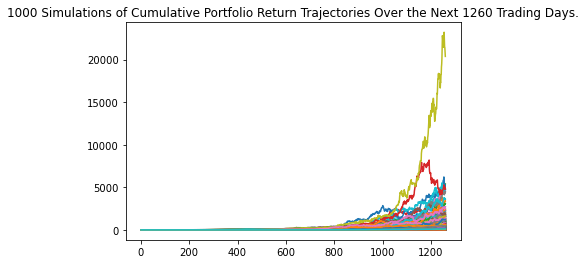

In [9]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

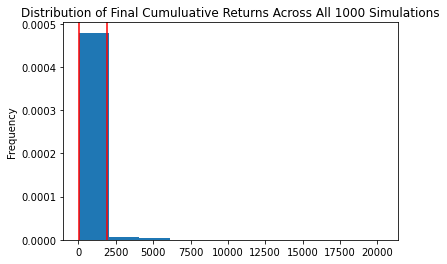

In [10]:
# Plot probability distribution and confidence intervals
att_dist_plot = MC_even_dist.plot_distribution()

In [11]:
# Fetch summary statistics from the Monte Carlo simulation results
att_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(att_tbl)

count            1000.000000
mean              397.900717
std               867.433946
min                 3.382482
25%                68.459924
50%               167.821271
75%               433.249562
max             20380.492545
95% CI Lower       12.077380
95% CI Upper     1940.536045
Name: 1260, dtype: float64


In [12]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
att_ci_lower = round(att_tbl[8]*15000,2)
att_ci_upper = round(att_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $181160.7 and $29108040.68.
